Add necessary files for notebook from github rep

In [1]:
# !git clone https://github.com/haleycab/murray-neuroscience-lab

Cloning into 'murray-neuroscience-lab'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 22 (delta 4), reused 22 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 11.65 MiB | 8.46 MiB/s, done.
Resolving deltas: 100% (4/4), done.


Import share drive files

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Notebook to process abf files into dictionaries with waveforms

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# !pip install pyabf
import pyabf


In [7]:
df = pd.read_csv('/Users/haleyoro/Desktop/murray-neuroscience-lab/4dpf_VC_MN_Mac.2012_04_25_cell3.csv',header=None)
# print(df.head())

Code to process excel spreadsheet into readable data frame with 'Trace name' as the index. Just download csv tab from spreadsheet and run

In [8]:

# Read the raw CSV , headers are irregular
data = df.iloc[1:,1:]
data


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,Trace name,ID,On time,Frequency,Swim description,NaN,Trace name,ID,On time,Freq,Swim description,NaN,NaN,Inhibitory Current,Inhibitory Charge,Normalized Inhibitory Current,Normalized Inhibitory Charge
2,2012_04_25_0030,1,3758.2,NaN,bout start; shock,NaN,2012_04_25_0027,1,4578.95,NaN,bout start; shock,NaN,Slope,26.33,33731.70525,0.023,0.02
3,2012_04_25_0030,2,3778.68,48.8281,NaN,NaN,2012_04_25_0027,2,4603.9,40.0802,NaN,NaN,Correlation coefficient,0.45,0.41,0.45,0.41
4,2012_04_25_0030,3,3812.75,29.3513,NaN,NaN,2012_04_25_0027,3,4629.87,38.506,NaN,NaN,P-value,0,0,0,0
5,2012_04_25_0030,4,3841.89,34.3171,NaN,NaN,2012_04_25_0027,4,4655.5,39.0168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2012_04_25_0033,36,6918.52,1.8533,bout start; shock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,2012_04_25_0033,37,6939.61,47.4158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,2012_04_25_0033,38,6961.89,44.8833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,2012_04_25_0033,39,6992.25,32.9381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:

# Each block has 5 columns: Trace name, ID, On time, Freq, Tags
num_cols = data.shape[1]
block_size = 5
print(num_cols)

17


In [25]:
data.iloc[0,0]

'Trace name'

In [54]:
# Find how many full 5-column blocks exist
blocks = []
for start in range(0, num_cols, block_size + 1):  # +1 accounts for those extra separators
    end = start + block_size
    if (end <= num_cols) & (data.iloc[0,start] == "Trace name"):
        block = data.iloc[:, start:end]
        print(block)
        block.columns = ['Trace name', 'ID', 'On time', 'Freq', 'Tags']
        blocks.append(block)

# Combine all blocks into one DataFrame
df_clean = pd.concat(blocks, ignore_index=True)

# Drop rows that are completely empty
df_clean = df_clean.dropna(how='all')
df_clean

                   1   2        3          4                  5
1         Trace name  ID  On time  Frequency   Swim description
2    2012_04_25_0030   1   3758.2        NaN  bout start; shock
3    2012_04_25_0030   2  3778.68    48.8281                NaN
4    2012_04_25_0030   3  3812.75    29.3513                NaN
5    2012_04_25_0030   4  3841.89    34.3171                NaN
..               ...  ..      ...        ...                ...
187  2012_04_25_0033  36  6918.52     1.8533  bout start; shock
188  2012_04_25_0033  37  6939.61    47.4158                NaN
189  2012_04_25_0033  38  6961.89    44.8833                NaN
190  2012_04_25_0033  39  6992.25    32.9381                NaN
191  2012_04_25_0033  40  7032.28    24.9813           bout end

[191 rows x 5 columns]
                  7    8        9        10                 11
1         Trace name   ID  On time     Freq   Swim description
2    2012_04_25_0027    1  4578.95      NaN  bout start; shock
3    2012_04_25_002

,Trace name,ID,On time,Freq,Tags
0,Trace name,ID,On time,Frequency,Swim description
1,2012_04_25_0030,1,3758.2,NaN,bout start; shock
2,2012_04_25_0030,2,3778.68,48.8281,NaN
3,2012_04_25_0030,3,3812.75,29.3513,NaN
4,2012_04_25_0030,4,3841.89,34.3171,NaN
...,...,...,...,...,...
334,2012_04_25_0029,61,9798.97,21.9539,NaN
335,2012_04_25_0029,62,9840.59,24.0269,NaN
336,2012_04_25_0029,63,9885.04,22.4972,NaN
337,2012_04_25_0029,64,9923.22,26.1917,NaN


In [55]:
df_clean['Trace name'] = df_clean['Trace name'].astype('string')
# df_clean = df_clean.reset_index(drop=True)
# df_clean


In [65]:
df_clean.loc[0,"ID"]

'ID'

In [57]:
def prepare_df(df):
    '''
    Function to prep df for make_waveforms function
    '''
    # Index needs to be reset
    df['Trace name'] = df['Trace name'].astype('string')

    # df.reset_index(inplace = True)
    # Make sure numeric values

    df["On time"] = pd.to_numeric(df["On time"], errors="coerce")
    df["Freq"] = pd.to_numeric(df["Freq"], errors="coerce")
    df["Seconds"] = df['On time']*0.001
    return df

In [58]:
prep_df = prepare_df(df_clean)
prep_df

,Trace name,ID,On time,Freq,Tags,Seconds
0,Trace name,ID,NaN,NaN,Swim description,NaN
1,2012_04_25_0030,1,3758.20,NaN,bout start; shock,3.75820
2,2012_04_25_0030,2,3778.68,48.8281,NaN,3.77868
3,2012_04_25_0030,3,3812.75,29.3513,NaN,3.81275
4,2012_04_25_0030,4,3841.89,34.3171,NaN,3.84189
...,...,...,...,...,...,...
334,2012_04_25_0029,61,9798.97,21.9539,NaN,9.79897
335,2012_04_25_0029,62,9840.59,24.0269,NaN,9.84059
336,2012_04_25_0029,63,9885.04,22.4972,NaN,9.88504
337,2012_04_25_0029,64,9923.22,26.1917,NaN,9.92322


In [59]:
df_clean.info()
prep_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 339 entries, 0 to 338
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Trace name  339 non-null    string 
 1   ID          339 non-null    object 
 2   On time     337 non-null    float64
 3   Freq        330 non-null    float64
 4   Tags        96 non-null     object 
 5   Seconds     337 non-null    float64
dtypes: float64(3), object(2), string(1)
memory usage: 18.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 339 entries, 0 to 338
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Trace name  339 non-null    string 
 1   ID          339 non-null    object 
 2   On time     337 non-null    float64
 3   Freq        330 non-null    float64
 4   Tags        96 non-null     object 
 5   Seconds     337 non-null    float64
dtypes: float64(3), object(2), string(1)
memory usage: 18.5+ KB


In [61]:
prep_df["Trace name"].unique()

<StringArray>
[     'Trace name', '2012_04_25_0030', '2012_04_25_0031', '2012_04_25_0032',
 '2012_04_25_0033', '2012_04_25_0027', '2012_04_25_0028', '2012_04_25_0029']
Length: 8, dtype: string

In [64]:
def trace_filter(df):
    pattern = r'^\d{4}_\d{2}_\d{2}_\d{4}$'
    index = df['Trace name'].str.match(pattern, na=False)
    df_filtered = df[index]
    return df_filtered

df = trace_filter(prep_df)
df

,Trace name,ID,On time,Freq,Tags,Seconds
1,2012_04_25_0030,1,3758.20,NaN,bout start; shock,3.75820
2,2012_04_25_0030,2,3778.68,48.8281,NaN,3.77868
3,2012_04_25_0030,3,3812.75,29.3513,NaN,3.81275
4,2012_04_25_0030,4,3841.89,34.3171,NaN,3.84189
5,2012_04_25_0030,5,3871.09,34.2466,bout end,3.87109
...,...,...,...,...,...,...
334,2012_04_25_0029,61,9798.97,21.9539,NaN,9.79897
335,2012_04_25_0029,62,9840.59,24.0269,NaN,9.84059
336,2012_04_25_0029,63,9885.04,22.4972,NaN,9.88504
337,2012_04_25_0029,64,9923.22,26.1917,NaN,9.92322


In [38]:
prep_df.loc['2012_04_25_0030',"Trace name"]

KeyError: '2012_04_25_0030'

Regex filtering to match trace format:

Get annotations for specific trace

Should look like this table:
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Trace name</th>
      <th>ID</th>
      <th>On time</th>
      <th>Freq</th>
      <th>Tags</th>
      <th>Seconds</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2012_08_01_0005</td>
      <td>1</td>
      <td>1488.65</td>
      <td>NaN</td>
      <td>bout start; spontaneous</td>
      <td>1.48865</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2012_08_01_0005</td>
      <td>2</td>
      <td>1518.00</td>
      <td>34.0716</td>
      <td>NaN</td>
      <td>1.51800</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2012_08_01_0005</td>
      <td>3</td>
      <td>1552.50</td>
      <td>28.9855</td>
      <td>NaN</td>
      <td>1.55250</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2012_08_01_0005</td>
      <td>4</td>
      <td>1591.26</td>
      <td>25.7998</td>
      <td>NaN</td>
      <td>1.59126</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2012_08_01_0005</td>
      <td>5</td>
      <td>1633.37</td>
      <td>23.7473</td>
      <td>NaN</td>
      <td>1.63337</td>
    </tr>
    <tr>
      <th>5</th>
      <td>2012_08_01_0005</td>
      <td>6</td>
      <td>1667.08</td>
      <td>29.6648</td>
      <td>NaN</td>
      <td>1.66708</td>
    </tr>
    <tr>
      <th>6</th>
      <td>2012_08_01_0005</td>
      <td>7</td>
      <td>1704.54</td>
      <td>26.6951</td>
      <td>NaN</td>
      <td>1.70454</td>
    </tr>
    <tr>
      <th>7</th>
      <td>2012_08_01_0005</td>
      <td>8</td>
      <td>1744.06</td>
      <td>25.3036</td>
      <td>NaN</td>
      <td>1.74406</td>
    </tr>
    <tr>
      <th>8</th>
      <td>2012_08_01_0005</td>
      <td>9</td>
      <td>1793.31</td>
      <td>20.3046</td>
      <td>bout end</td>
      <td>1.79331</td>
    </tr>
    <tr>
      <th>9</th>
      <td>2012_08_01_0005</td>
      <td>10</td>
      <td>4239.18</td>
      <td>0.4089</td>
      <td>bout start; spontaneous</td>
      <td>4.23918</td>
    </tr>
    <tr>
      <th>10</th>
      <td>2012_08_01_0005</td>
      <td>11</td>
      <td>4268.84</td>
      <td>33.7154</td>
      <td>NaN</td>
      <td>4.26884</td>
    </tr>
    <tr>
      <th>11</th>
      <td>2012_08_01_0005</td>
      <td>12</td>
      <td>4309.38</td>
      <td>24.6670</td>
      <td>NaN</td>
      <td>4.30938</td>
    </tr>
    <tr>
      <th>12</th>
      <td>2012_08_01_0005</td>
      <td>13</td>
      <td>4353.41</td>
      <td>22.7118</td>
      <td>bout end</td>
      <td>4.35341</td>
    </tr>
    <tr>
      <th>13</th>
      <td>2012_08_01_0005</td>
      <td>14</td>
      <td>8752.04</td>
      <td>0.2273</td>
      <td>bout start; shock</td>
      <td>8.75204</td>
    </tr>
    <tr>
      <th>14</th>
      <td>2012_08_01_0005</td>
      <td>15</td>
      <td>8776.85</td>
      <td>40.3063</td>
      <td>NaN</td>
      <td>8.77685</td>
    </tr>
    <tr>
      <th>15</th>
      <td>2012_08_01_0005</td>
      <td>16</td>
      <td>8801.13</td>
      <td>41.1862</td>
      <td>NaN</td>
      <td>8.80113</td>
    </tr>
    <tr>
      <th>16</th>
      <td>2012_08_01_0005</td>
      <td>17</td>
      <td>8817.58</td>
      <td>60.7903</td>
      <td>NaN</td>
      <td>8.81758</td>
    </tr>
    <tr>
      <th>17</th>
      <td>2012_08_01_0005</td>
      <td>18</td>
      <td>8847.11</td>
      <td>33.8639</td>
      <td>NaN</td>
      <td>8.84711</td>
    </tr>
    <tr>
      <th>18</th>
      <td>2012_08_01_0005</td>
      <td>19</td>
      <td>8890.84</td>
      <td>22.8676</td>
      <td>NaN</td>
      <td>8.89084</td>
    </tr>
    <tr>
      <th>19</th>
      <td>2012_08_01_0005</td>
      <td>20</td>
      <td>8922.98</td>
      <td>31.1139</td>
      <td>NaN</td>
      <td>8.92298</td>
    </tr>
  </tbody>
</table>
</div>

Function that splits abf df into dictionary with each waveworm, just load abf file and then pass cleaned df that goes with abf file

In [ ]:
def make_waveforms(abf,df):
    '''
    Function that takes an abf file and a df of the annotations
    Returns a dictionary with waveforms labeled by their frequency
    '''
    abf.setSweep(sweepNumber=0, channel=0)
    x = abf.sweepX
    y = abf.sweepY
    abf_df = pd.DataFrame({
        'Time': x,
        'Current': y
    })
    df["On time"] = pd.to_numeric(df["On time"], errors="coerce")
    df["Seconds"] = df['On time']*0.001
    waveforms = {}
    for i in range(len(df) - 1):
        t_0 = df.loc[i, 'Seconds']
        t_f = df.loc[i + 1, 'Seconds']
        phase_0 = int(t_0 * 100000)
        phase_1 = int(t_f * 100000)
        abf_waveform = abf_df.loc[phase_0:phase_1]
        phase = (abf_waveform["Time"] - t_0) / (t_f - t_0)
        abf_waveform["Phase"] = phase
        freq = df.loc[i + 1, "Freq"]
        waveforms[freq] = abf_waveform

    return waveforms


Load abf file and see what it looks like

In [ ]:
abf = pyabf.ABF('/Users/Haley/Desktop/Neuroscience Lab/sandeeps data/cell1/2012_04_25_0001.abf')

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29667/2682415171.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


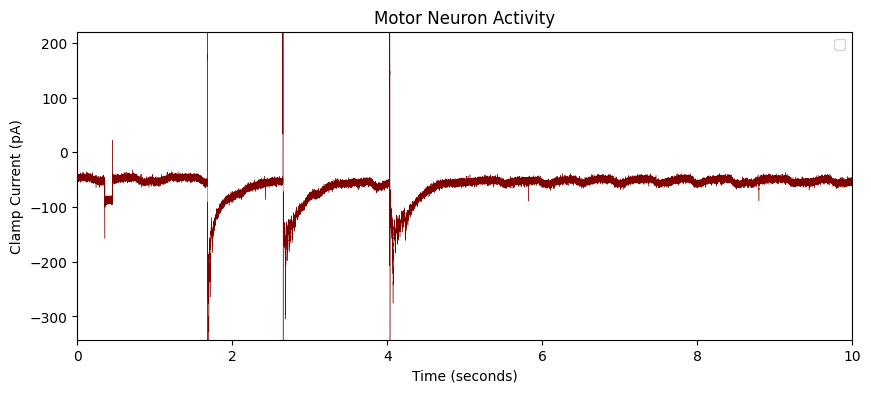

In [ ]:
def get_std_range(array, stdnum=8):
    """
    Returns the lower and upper bounds of a region centered at the mean
    that contains the given percentage of the data, assuming a normal distribution.

    Returns:
    - (lower_bound, upper_bound)
    """
    mean = np.mean(array)
    std = np.std(array)

    lower = mean - stdnum * std
    upper = mean + stdnum * std
    return lower, upper

def plot_motorneuron_activity(abf):
    fig = plt.figure(figsize=(10, 4))
    # plot the first channel
    abf.setSweep(sweepNumber=0, channel=0)
    plt.plot(abf.sweepX, abf.sweepY,linewidth = 0.3,color='maroon')
    y_min, y_max = get_std_range(abf.sweepY,10)

    # decorate the plot
    plt.title("Motor Neuron Activity")
    plt.ylabel(abf.sweepLabelY)
    plt.xlabel(abf.sweepLabelX)
    plt.axis([0, 10, y_min, y_max]) # x bound, y bound
    plt.legend()
    plt.show()

plot_motorneuron_activity(abf)

Make dictionary with annotations file and abf

In [ ]:
dict = make_waveforms(abf, annotation_df)
dict


/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29667/4170831615.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abf_waveform["Phase"] = phase
/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29667/4170831615.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abf_waveform["Phase"] = phase
/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29667/4170831615.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

{np.float64(64.5995):            Time     Current     Phase
 169422  1.69422 -286.987274  0.000000
 169423  1.69423 -285.644501  0.000646
 169424  1.69424 -286.376923  0.001292
 169425  1.69425 -287.231415  0.001938
 169426  1.69426 -287.597626  0.002584
 ...         ...         ...       ...
 170966  1.70966 -224.121078  0.997416
 170967  1.70967 -224.975571  0.998062
 170968  1.70968 -226.562485  0.998708
 170969  1.70969 -229.003891  0.999354
 170970  1.70970 -231.567368  1.000000
 
 [1549 rows x 3 columns],
 np.float64(36.9276):            Time     Current         Phase
 170970  1.70970 -231.567368  8.199579e-15
 170971  1.70971 -233.764633  3.692762e-04
 170972  1.70972 -235.595688  7.385524e-04
 170973  1.70973 -236.572250  1.107829e-03
 170974  1.70974 -236.816391  1.477105e-03
 ...         ...         ...           ...
 173674  1.73674 -142.211899  9.985229e-01
 173675  1.73675 -143.066391  9.988922e-01
 173676  1.73676 -143.066391  9.992614e-01
 173677  1.73677 -143.798813  9.

Waveforms labeled by frequency:

In [ ]:
dict.keys()

dict_keys([np.float64(64.5995), np.float64(36.9276), np.float64(26.8889), np.float64(1.0987), np.float64(38.6847), np.float64(38.3142), np.float64(31.5756), np.float64(27.7469), np.float64(32.3311), np.float64(28.1928), np.float64(0.8343), np.float64(33.0142), np.float64(31.9795), np.float64(34.8068), np.float64(27.9252), np.float64(30.9215), np.float64(25.6279), np.float64(30.8261)])

Get one wave using key

In [ ]:
onewave = dict[np.float64(64.5995)]
print(onewave)

           Time     Current     Phase
169422  1.69422 -286.987274  0.000000
169423  1.69423 -285.644501  0.000646
169424  1.69424 -286.376923  0.001292
169425  1.69425 -287.231415  0.001938
169426  1.69426 -287.597626  0.002584
...         ...         ...       ...
170966  1.70966 -224.121078  0.997416
170967  1.70967 -224.975571  0.998062
170968  1.70968 -226.562485  0.998708
170969  1.70969 -229.003891  0.999354
170970  1.70970 -231.567368  1.000000

[1549 rows x 3 columns]


Bin data

In [ ]:
def bin_wave(onewave):
    # Make edges for the bin
    bins = np.linspace(0, 1, 51, endpoint = True)
    # print(bins)

    # Cut the phase into bins
    onewave['Phase Bin'] = pd.cut(onewave['Phase'], bins=bins, include_lowest=True)
    # print(onewave)

    # Group by the bins and calculate the average current
    # binned_avg = onewave.groupby(by='Phase Bin','Current')
    binned_avg = onewave.groupby('Phase Bin')['Current'].mean().reset_index()
    # print(binned_avg)

    # Get phase column for plotting (middle of bin)
    phase = np.arange(0.01, 1.00001, 0.02)
    # len(phase)
    binned_avg['Phase'] = phase
    return binned_avg

bin_wave(onewave)

/var/folders/mw/pz4gm95j6zb7syl48vm11wrw0000gn/T/ipykernel_29667/1289150563.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_avg = onewave.groupby('Phase Bin')['Current'].mean().reset_index()


,Phase Bin,Current,Phase
0,"(-0.001, 0.02]",-296.268555,0.01
1,"(0.02, 0.04]",-308.640961,0.03
2,"(0.04, 0.06]",-341.391266,0.05
3,"(0.06, 0.08]",-397.764099,0.07
4,"(0.08, 0.1]",-401.375031,0.09
5,"(0.1, 0.12]",-370.034454,0.11
6,"(0.12, 0.14]",-375.074799,0.13
7,"(0.14, 0.16]",-392.270935,0.15
8,"(0.16, 0.18]",-406.687073,0.17
9,"(0.18, 0.2]",-371.944275,0.19


Plot the waveform"

<Axes: xlabel='Phase'>

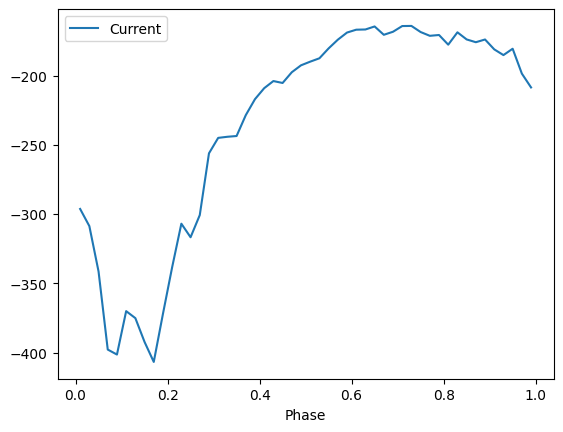

In [ ]:
binned_avg.plot('Phase','Current',kind = 'line')